# Atividade 02
Nesta atividade vocês precisarão analisar as condições meteorológicas para realizar o estudo de dispersão de poluentes atmosféricos do seu empreendimento. Procurem as coordenadas do empreendimento de vocês e analisem as condições atmosféricas no entorno. Utilize o dado da estação meteorológica e de sondagem mais próximo.
A análise será feita em três etapas:

## 1 - Condição meteorológica de superfície (estação meteorológica)
Avalie as condições meteorológicas no ano de 2023 e elabore figuras da série temporal bruta e remova os dados discrepantes. Elabore também figuras tipo boxplot e com médias mensais. No gráfico das médias mensais, desenhem a média como uma linha sólida e uma sombra que determine as mínimas e máximas mensais. Use o seguinte pacote para desenhar a sombra: https://matplotlib.org/stable/gallery/lines_bars_and_markers/fill_between_demo.html. As seguintes condições meteorológicas devem ser analisadas: temperatura, umidade, pressão, cobertura de nuvens. velocidade e direção do vento. Para analisar o vento, elabore a rosa dos ventos. No seu relatório, deve conter uma discussão sobre as condições meteorológicas do local e possíveis reflexos na qualidade do ar.

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime 
from windrose import WindroseAxes
from siphon.simplewebservice.wyoming import WyomingUpperAir


In [2]:
# Selecionando arquivo para análise 
path = "C:\\ENS5173\\inputs\\meteoSuperficie\\metar_2023.csv"
metSuperficie = pd.read_csv(path) 

# Criar uma coluna de data e hora combinando as colunas separadas
metSuperficie['datetime'] = pd.to_datetime(metSuperficie[['year', 'month', 'day', 'hour']])
metSuperficie.set_index(metSuperficie['datetime'], inplace=True) 
 
# Lista de colunas que serão analisadas 
analisar = ('temp', 'relh', 'p', 'cco', 'ws', 'wd') 

# Print dos dados de entrada
print(metSuperficie, '\n\n', analisar) 

                     day  month  year  hour  ct     wd        ws      hc  ccp  \
datetime                                                                        
2023-01-01 00:00:00    1      1  2023     0 NaN  360.0  5.144440  2133.6  3.0   
2023-01-01 01:00:00    1      1  2023     1 NaN  360.0  4.115552  3048.0  6.0   
2023-01-01 02:00:00    1      1  2023     2 NaN  360.0  4.115552  3048.0  6.0   
2023-01-01 03:00:00    1      1  2023     3 NaN  350.0  4.629996  3048.0  6.0   
2023-01-01 04:00:00    1      1  2023     4 NaN  340.0  5.144440  1219.2  6.0   
...                  ...    ...   ...   ...  ..    ...       ...     ...  ...   
2023-12-31 19:00:00   31     12  2023    19 NaN  110.0  4.629996  2438.4  6.0   
2023-12-31 20:00:00   31     12  2023    20 NaN  130.0  3.601108  2438.4  6.0   
2023-12-31 21:00:00   31     12  2023    21 NaN  120.0  2.057776  2438.4  6.0   
2023-12-31 22:00:00   31     12  2023    22 NaN  190.0  2.057776  2438.4  6.0   
2023-12-31 23:00:00   31    

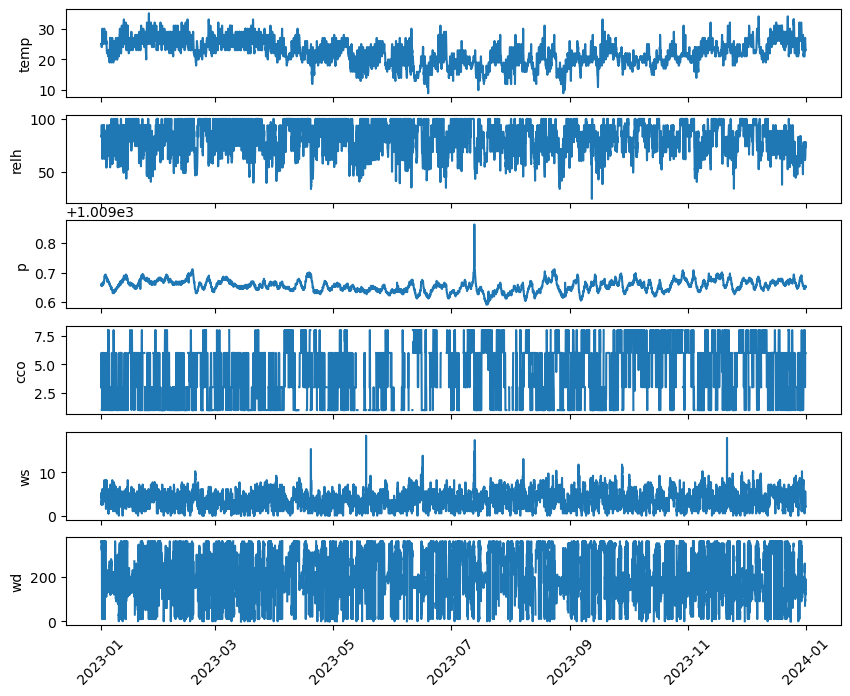

In [3]:
# Analisando os dados através de figuras 
fig,ax = plt.subplots(len(analisar), sharex=True, figsize=(10, 8))
for i in range(len(analisar)):
    if analisar[i] in metSuperficie:
        ax[i].plot(metSuperficie['datetime'], metSuperficie[analisar[i]])
        ax[i].set_ylabel(analisar[i]) 
ax[-1].tick_params(axis='x', rotation=45) 


array([<Axes: xlabel='temp'>, <Axes: xlabel='relh'>, <Axes: xlabel='p'>,
       <Axes: xlabel='cco'>, <Axes: xlabel='ws'>, <Axes: xlabel='wd'>],
      dtype=object)

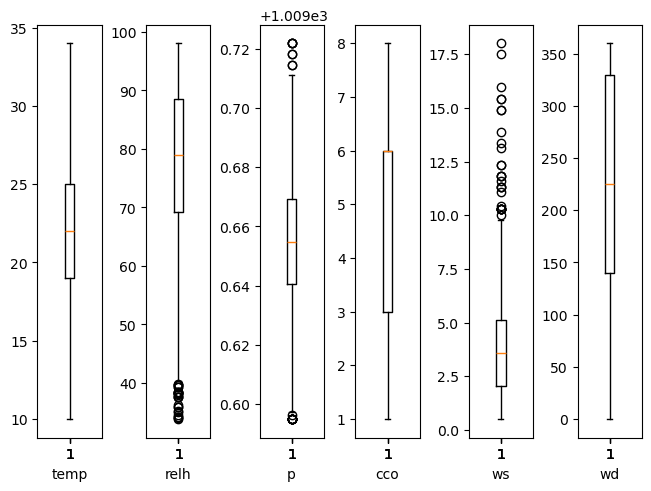

In [4]:
# Função para criar boxplot 
def boxplot(dados, colunas, percMin, percMax,):
    fig,ax = plt.subplots(1, len(colunas), sharex=True, constrained_layout=True)
    for i in range(len(colunas)):
        if colunas[i] in dados:
            if np.isnan(np.percentile(dados[colunas[i]], percMin) and np.percentile(dados[colunas[i]], percMax)) == False: 
                ax[i].boxplot(dados[colunas[i]]
                          [(dados[colunas[i]] < np.percentile(dados[colunas[i]], percMax)) & 
                          (dados[colunas[i]] > np.percentile(dados[colunas[i]], percMin))])
            else:
                ax[i].boxplot(dados[colunas[i]][~np.isnan(dados[colunas[i]])])
            ax[i].set_xlabel(colunas[i]) 
    return ax

# Dados brutos
boxplot(metSuperficie, analisar, 0, 100) 

In [5]:
# Identificando valores dos percentis 0.5 e 99
for i in range(len(analisar)):
    if (analisar[i] in metSuperficie):
        aux1 = np.percentile(metSuperficie[analisar[i]], 0.5)
        aux2 = np.percentile(metSuperficie[analisar[i]], 99)
        print('O percentil 0.5 da ' +str(analisar[i]) +' é '+str(aux1)) 
        print('O percentil 99 da '+str(analisar[i])+' é '+str(aux2)+'\n') 

O percentil 0.5 da temp é 12.0
O percentil 99 da temp é 31.0

O percentil 0.5 da relh é 41.71
O percentil 99 da relh é 100.0

O percentil 0.5 da p é 1009.6045256529728
O percentil 99 da p é 1009.6967607391396

O percentil 0.5 da cco é nan
O percentil 99 da cco é nan

O percentil 0.5 da ws é 0.0
O percentil 99 da ws é 8.745548

O percentil 0.5 da wd é nan
O percentil 99 da wd é nan



array([<Axes: xlabel='temp'>, <Axes: xlabel='relh'>, <Axes: xlabel='p'>,
       <Axes: xlabel='cco'>, <Axes: xlabel='ws'>, <Axes: xlabel='wd'>],
      dtype=object)

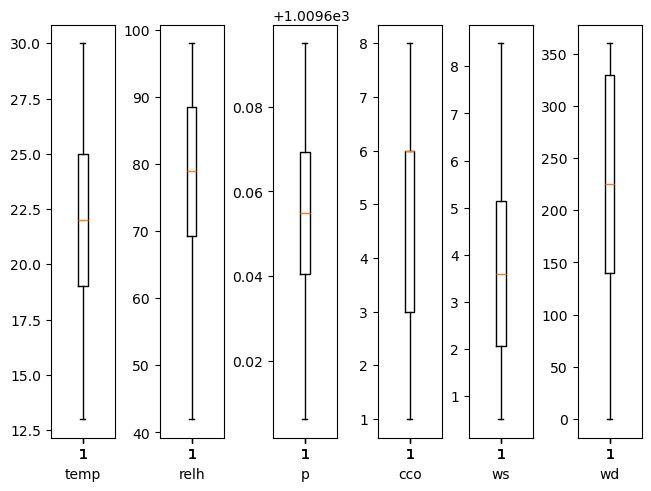

In [6]:
# Dados tratados
boxplot(metSuperficie, analisar, 0.5, 99) 

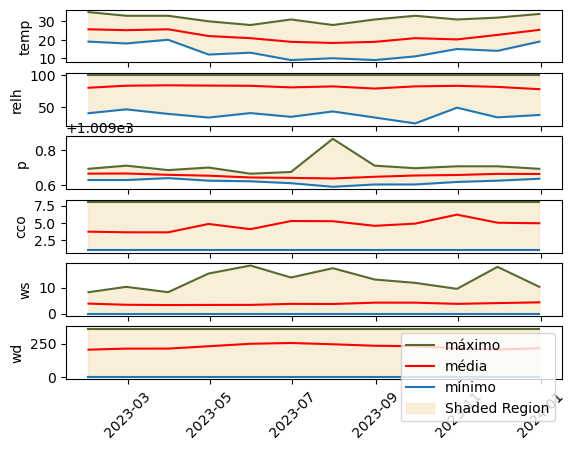

In [7]:
# Estatísticas 
media_mensal = metSuperficie.resample('ME').mean()
min_mensal = metSuperficie.resample('ME').min()
max_mensal = metSuperficie.resample('ME').max()

# Figuras da série temporal 
fig,ax = plt.subplots(len(analisar),sharex=True)
for i in range(len(analisar)):
    if analisar[i] in metSuperficie:
        ax[i].plot(media_mensal.index, max_mensal[analisar[i]], color='darkolivegreen', label='máximo')
        ax[i].plot(media_mensal.index, media_mensal[analisar[i]],color='red', label='média')
        ax[i].plot(media_mensal.index, min_mensal[analisar[i]], label='mínimo')
        ax[i].fill_between(media_mensal.index, min_mensal[analisar[i]], max_mensal[analisar[i]], color='wheat', alpha=0.5, label='Shaded Region')
        ax[i].set_ylabel(analisar[i]) 
ax[-1].tick_params(axis='x', rotation=45)
plt.legend() 
plt.show() 

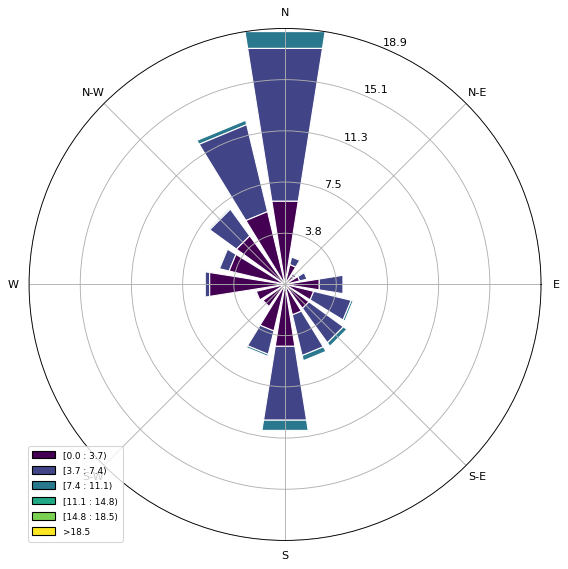

In [8]:
ax = WindroseAxes.from_ax()
ax.bar(metSuperficie['wd'], metSuperficie['ws'], normed=True, opening=0.8, edgecolor="white")
ax.set_legend() 


## 2 - Análise do perfil de temperatura
Analise o perfil de temperatura da estação de monitoramento no aeroporto de Florianópolis utilizando o pacote Siphon do Python. Analise os dados de 0 e 12 horas durante10 dias, sendo 5 no verão e 5 no inverno. Determine os pontos de inversão e possível altura da camada limite. Avalie a evolução da camada limite ao longo do dia e entre as estações do ano.

In [9]:
# Data para análise
date = datetime(2024, 1, 10, 12)
# local da análise
station = 'SBFL'

# Extraindo os dados
df = WyomingUpperAir.request_data(date, station)
print(df) 

     pressure   height  temperature  dewpoint  direction  speed     u_wind  \
0      1011.0      5.0         27.8      22.8        330      6   3.000000   
1      1000.0    105.0         26.0      21.2        315      8   5.656854   
2       964.0    428.0         23.6      19.1        315     13   9.192388   
3       925.0    790.0         23.0      15.0        355     15   1.307336   
4       911.0    923.0         22.6      13.6          7     17  -2.071779   
..        ...      ...          ...       ...        ...    ...        ...   
109      19.0  26746.0        -51.3     -86.1         90     30 -30.000000   
110      17.0  27474.0        -48.7     -85.2         85     43 -42.836372   
111      16.0  27871.0        -47.3     -84.7         95     48 -47.817346   
112      15.3  28164.0        -46.3     -84.3         88     45 -44.972587   
113      15.0      NaN          NaN       NaN         85     44 -43.832567   

           v_wind station  station_number                time  